# 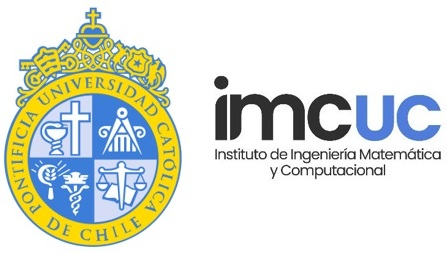  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2023-1**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Actividad 02: Extracción y Revisión de Datos</center></h1>

Esta actividad busca aplicar lo que acabamos de ver en clases sobre extracción de datos y conectarlo con la materia de "Tipos de Datos" que hemos visto en las clases pasadas.

## Instrucciones

Esto Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados a su repositorio personal, en una carpeta nueva llamada "Actividad 02". Asegúrese que ambas ayudantes tienen acceso a su repositorio para que puedan corregir. La actividad debe ser subida antes del final de la clase. Actualizaciones de su repositorio posteriores a esa fec</b>

Para esta actividad deben hacer lo siguiente:
<ol>
<li>Extraer datos</li>

Para esta actividad usaremos una base de datos de temblores que tiene la USGS (United States Geological Service) en https://www.usgs.gov/.

He preparado una base de datos con todos los temblores con magnitud mayor a 2.5, desde el 1ro de enero hasta el 23 de agosto de este año. La descripción de cada parámetro la pueden encontrar acá: https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
    
Usando la librería `requests` descargue y guarde en un archivo en su repositorio local los datos que están disponibles en el siguiente URL:
    
`url='https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true'`
    
<br>

<li>Formato</li>

¿En qué formato están los datos descargados? Identifique si son datos estructurados, semi-estructurados o no estructurados, explicando claramente por qué los categoriza así.
    
<br>
    
<li>DataFrame de análisis</li>

Usando los elementos que están bajo la categoría `features`, construya un DataFrame con los datos bajados y muestre parte de la tabla usando el método `.head()`.
    
<br>
    
<li>Preguntas</li>

Realice las dos siguientes actividades:

4.1 Profundidad:
    
Entre los tembroles que hay en la base, ¿Cuál fue el más profundo y qué profundidad tuvo? Sea claro en su respuesta.
    
4.2 Gráfico de intensidad:
    
Los temblores están medidos en diferfentes unidades a lo largo de los datos (puede ver la unidad en la columna `magType`), lo que no los hace a todos comparables. Elija un tipo de unidad (puede ser `me`, `mb`, `ml` u otro) y haga aun gráfico mostrando la intensidad de cada temblor a lo largo del tiempo.
    
No olvide poner nombres a los ejes y en el título ponga las unidades elegidas y guarde la imagen con el nombre: `temblores_APELLIDO.jpg` donde reemplace `APELLIDO` por su propio apellido.

El siguiente es un ejemplo usando las unidades `mw` para que use como guía, pero no es necesario que use las mismas unidades o que cambie los tipos de marcadores o líneas para que sean iguales a este ejemplo.
</ol>

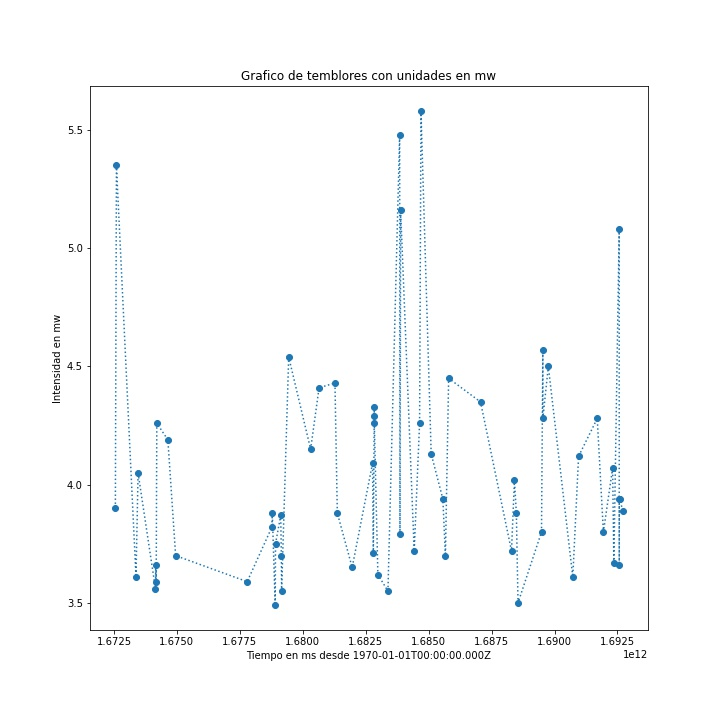

## Rúbrica

- Si han logrado los puntos 1 y 2: 3.0
- Si han logrado hasta el punto 3: 4.0
- Si han logrado hasta el punto 4, pero este último parcialmente: 5.0
- Si han logrado todo: 7.0

## 1. Extraer datos

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
import json

In [2]:
requests_data = requests.get("https://github.com/raxlab/imt2200-data/blob/main/actividades/actividad%2002/query.json?raw=true")
open("terremotos.json", "wb").write(requests_data.content) # Descargamos los datos y los guardamos


11788578

## 2. Formato

<b>Respuesta:</b> El formato del archivo es ".json", por ende se trata de informacion semi-estructurada.


## 3. DataFrame de Análisis

In [3]:
# respuesta:
with open("terremotos.json", "r") as archivo:
        diccionario = json.load(archivo)
    
df = pd.DataFrame(pd.json_normalize(diccionario, record_path=["features"]))
df.head()

,type,id,properties.mag,properties.place,properties.time,properties.updated,properties.tz,properties.url,properties.detail,properties.felt,...,properties.types,properties.nst,properties.dmin,properties.rms,properties.gap,properties.magType,properties.type,properties.title,geometry.type,geometry.coordinates
0,Feature,ak023asu4hj0,2.90,"45 km NE of Ouzinkie, Alaska",1692791261378,1692793742040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,NaN,0.60,NaN,ml,earthquake,"M 2.9 - 45 km NE of Ouzinkie, Alaska",Point,"[-151.9232, 58.1926, 26.9]"
1,Feature,hv73539357,2.71,"3 km SSW of Pāhala, Hawaii",1692788510490,1692788854040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",47.0,NaN,0.14,91.0,ml,earthquake,"M 2.7 - 3 km SSW of Pāhala, Hawaii",Point,"[-155.4931640625, 19.1736660003662, 32.9300003..."
2,Feature,us7000kqau,4.30,"93 km NNW of Lae, Papua New Guinea",1692786843757,1692790548040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",22.0,3.49700,1.00,142.0,mb,earthquake,"M 4.3 - 93 km NNW of Lae, Papua New Guinea",Point,"[146.8111, -5.9021, 95.043]"
3,Feature,us7000kqap,4.70,"15 km E of Pulandian, China",1692785987446,1692791110513,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,8.0,...,",dyfi,origin,phase-data,",68.0,4.01500,0.46,57.0,mb,earthquake,"M 4.7 - 15 km E of Pulandian, China",Point,"[122.1398, 39.4117, 10]"
4,Feature,pr71421983,2.56,None,1692784919970,1692786039030,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",14.0,0.09577,0.33,135.0,md,earthquake,M 2.6 -,Point,"[-66.809, 18.044, 11.81]"


## 4. Preguntas

### 4.1 Profundidad

Los datos de profundidad se encuentran en el tercer elemento adentro del `key` llamado `coordinates` que está adentro del `key` llamado `geometry`. Una forma simple de acceder es transformar la columna `coordinates` a una lista de listas usando el comando `.values.tolist()` y luego crear un DataFrame con las listas obtenidas con el comando `pd.DataFrame(<data>, columns`` = ['lat', 'long', 'deep'])`. Con eso la columna `deep` tendrá la profundidad de cada evento, que si desean pueden agregar al DataFrame original.

In [4]:
coordinates = df[["geometry.coordinates"]].values.tolist()

dict_coordinates = {
    "lat" : list(map(lambda x: x[0][0], coordinates)),
    "long" : list(map(lambda x: x[0][1], coordinates)),
    "deep": list(map(lambda x: x[0][2], coordinates))
}
df_coordinates = pd.DataFrame(dict_coordinates)
df = df.join(df_coordinates) # Agrego las nuevas col, al dataframe

# Buscamos los valores
max_deep = df_coordinates.sort_values("deep", ascending=False)
print("La mayor cantidad se encuentra en:\n{max_value}".format(max_value = max_deep.loc[max_deep["deep"] == 681.238]))


La mayor cantidad se encuentra en:
           lat     long     deep
9676  169.3241 -13.1462  681.238


### 4.2 Grafico

Importante notar que el elemento `time` de cada medición está en milisegundos desde `1970-01-01T00:00:00.000Z`. No es necesario que transforme ese valor en una fecha, sólo use el tiempo directamente para el eje X de su gráfico. Ya aprenderemos a transformar este tipo de datos en otro formato.

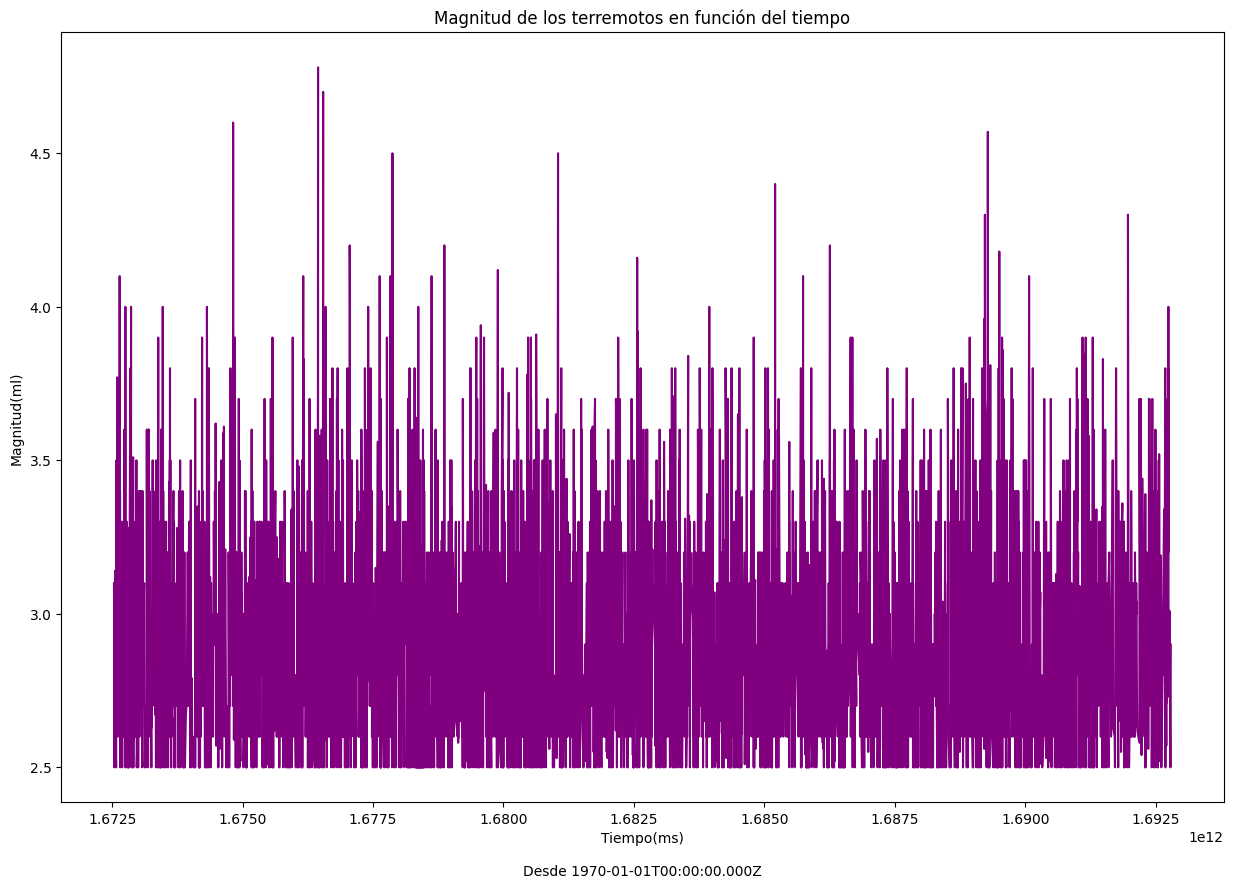

In [15]:

eje_y = df[df["properties.magType"] == "ml"]

plt.figure(figsize=(15, 10))
plt.plot(eje_y["properties.time"], eje_y["properties.mag"], color="purple")
plt.title("Magnitud de los terremotos en función del tiempo")
plt.xlabel("Tiempo(ms)\n\nDesde 1970-01-01T00:00:00.000Z")
plt.ylabel("Magnitud(ml)")
plt.savefig("terremotos_ORTIZ.png")
plt.show()
